# DBSCAN Implementation
I have read the method here https://en.wikipedia.org/wiki/DBSCAN

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

Parameters are set here, in which
 - e is the maximum radius of the neighborhood,
 - minpt is the minimum points to form a cluster.
 
Since the functions are using the problem space (x, y), they must be changed on changing the problem. For example adding the 3rd or 4th dimentions.

In [20]:
e = 7
minpt = 8

Noise = -1
Undefined = 0

def dist(i, j):
    return math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2)

def neighbors(i):
    result = {j for j in range(n) if i != j and dist(i, j) <= e}
    return result

The problem to be clustered is defined here:

In [21]:
n = 500
x = np.random.rand(n) * 100
y = np.random.rand(n) * 100

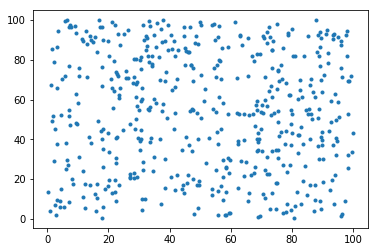

In [22]:
fig1 = plt.figure()
l, = plt.plot(x, y, '.')
plt.show()

The method is called in the below cell:

In [18]:
label = np.zeros(n)
C = 0
for i in range(n):
    if label[i] != Undefined:
        continue
    N = neighbors(i)
    if len(N) < minpt:
        label[i] = Noise
        continue
    C = C + 1
    label[i] = C
    S = {ng for ng in N if ng != i}
    while bool(S):
        #print(S)
        j = S.pop()
        if label[j] != Undefined and label[j] != Noise:
            continue
        if label[j] == Undefined or label[j] == Noise:
            label[j] = C
        N = neighbors(j)
        if len(N) >= minpt:
            S = S.union(N)

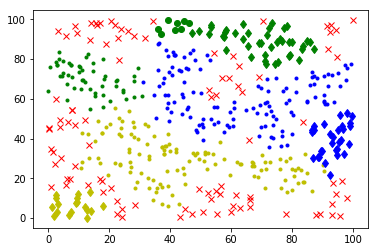

In [19]:
g=['rx','b.','y.','g.','bd','yd','gd','go','bo','yo','gx','r.','r.','r.']
plt.figure()
i = [x[ii] for ii in range(n) if label[ii] == -1]
j = [y[jj] for jj in range(n) if label[jj] == -1]
l, = plt.plot(i, j, g[0])
for k in range(1, C + 1):
    i = [x[ii] for ii in range(n) if label[ii] == k]
    j = [y[jj] for jj in range(n) if label[jj] == k]
    l, = plt.plot(i, j, g[k%len(g)])
plt.show()